# Midterm
## Evan Lynch

In [1]:
import numpy as np
import random
import itertools

### 1. 

- Find a solution using Tabu search. 
- Compare the solution (number of steps to reach solution) with that solved in class.
- Tabu list – last three moves cannot be swapped again. 
- Initial solution 2143.

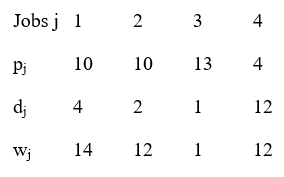

In [2]:
#matrix representation of the processing times, due dates , and weights for each job j
jobs_matrix = np.array([[10,10,13,4],[4,2,1,12],[14,12,1,12]])
p = jobs_matrix[0]
d = jobs_matrix[1]
w = jobs_matrix[2]

def make_neighbor(current_solution,tabu_list):
    """Finds a valid neighboring solution"""
    invalid_neighbor = True
    while invalid_neighbor == True:
        #swap two jobs in the sequence
        swaps = np.random.choice(np.indices([4])[0],2,replace=False)
        swap1 = swaps[0]
        swap2 = swaps[1]
        current_solution[swap1],current_solution[swap2] = current_solution[swap2], current_solution[swap1]
        invalid_neighbor = any([all(current_solution==tabu) for tabu in tabu_list])
        if invalid_neighbor==False:
            neighbor = current_solution
    return neighbor

def update_tabu_list(tabu_list,current_solution):
    """Keeps the tabu list updated"""
    #place the current solution as the last solution in the list
    tabu_list = np.concatenate((tabu_list,[current_solution]),axis=0)
    #remove the first solution in the list   
    tabu_list = np.delete(tabu_list,0,axis=0)
    return tabu_list

def weighted_tardiness(p,d,w,solution):
    """Calculates the objective"""
    #calculate the completion times
    current_day = 0
    c = [0,0,0,0]
    for j in solution:
        j=j-1
        c[j] = current_day+p[j]
        current_day+=p[j]
    #compare completion times with the due dates to see how tardy the jobs are
    t = c-d
    #calculate the weighted tardiness
    WT = np.dot(w,t)  
    return WT

def tabu_search(solution,p,d,w,tabu_list,max_iterations=200):
    """Performs the tabu search heuristic"""
    best_solution = None
    best_solution_WT = 1000
    iteration = 0
    while iteration<max_iterations:
        #make a neighboring solution
        solution = make_neighbor(solution,tabu_list)
        #evaluate the objective
        WT = weighted_tardiness(p,d,w,solution)
        #possibly update best_solution
        if WT<best_solution_WT:
            best_solution = solution.copy()
            best_solution_WT = WT
            iterations_to_reach_best = iteration

        #update the tabu list
        tabu_list = update_tabu_list(tabu_list,solution)
        
        #update iteration_counter
        iteration+=1
    return best_solution,best_solution_WT,tabu_list,iterations_to_reach_best

#initial solution and tabu list
solution = np.array([2,1,4,3])
tabu_list = np.zeros(shape=(3,4)) 

#run tabu search
best_solution,best_solution_WT,tabu_list,iterations_to_reach_best = tabu_search(solution,p,d,w,tabu_list)

print('best solution found:',best_solution)
print('lowest weighted tardiness found:',best_solution_WT)
print(f'it took {iterations_to_reach_best} iterations to reach the best solution found, compared to 5 in the Excel')

best solution found: [4 1 2 3]
lowest weighted tardiness found: 344
it took 21 iterations to reach the best solution found, compared to 5 in the Excel


### 2. 

- Minimize the function below using a binary representation of length 5. 
- Initial solution 00011. 
- Use Tabu search with Tabu list of length 2
- **! Assumption: using base 2**
$$ y^2-30ycos(50y)+20ysin(70y) $$

In [2]:
def calculate_objective(y):
    objective = (y**2)-(30*y*np.cos(50*y))+(20*y*np.sin(70*y))
    return objective

# def make_neighbor(current_solution,tabu_list):
#     """Finds a valid neighboring solution"""
#     invalid_neighbor = True
#     while invalid_neighbor == True:
#         #swap two positions in the sequence
#         swaps = np.random.choice(np.indices([5])[0],2,replace=False)
#         swap1 = swaps[0]
#         swap2 = swaps[1]
#         current_solution = list(current_solution)
#         current_solution[swap1],current_solution[swap2] = current_solution[swap2], current_solution[swap1]
#         current_solution = ''.join(current_solution)
#         invalid_neighbor = any([current_solution==tabu for tabu in tabu_list])
#         if invalid_neighbor==False:
#             neighbor = current_solution
#     return neighbor

def make_neighbor(current_solution,tabu_list):
    """Finds a valid neighboring solution"""
    invalid_neighbor = True
    while invalid_neighbor == True:
        index = np.random.choice(np.indices([5])[0],1,replace=False)[0]
        current_solution = list(current_solution)
        current_solution[index] = str(1) if current_solution[index]==str(0) else str(0)
        current_solution = ''.join(current_solution)
        invalid_neighbor = any([current_solution==tabu for tabu in tabu_list])
        if invalid_neighbor==False:
            neighbor = current_solution
    return neighbor

def update_tabu_list(tabu_list,current_solution):
    """Keeps the tabu list updated"""
    #place the current solution as the last solution in the list
    tabu_list.append(current_solution)
    #remove the first solution in the list  
    del tabu_list[0]
    return tabu_list

def tabu_search(y,tabu_list,max_iterations=400):
    """Performs the tabu search heuristic"""
    best_solution_bin = initial_solution
    best_solution = int(best_solution_bin,base=bin_base)
    best_solution_obj = calculate_objective(int(initial_solution,base=bin_base))
    tabu_list = update_tabu_list(tabu_list,initial_solution)
    y_bin = initial_solution
    iteration = 0
    while iteration<max_iterations:
        #make a neighboring solution
        y_bin = make_neighbor(y_bin,tabu_list)
        y = int(y_bin,base=bin_base)
        #evaluate the objective
        obj = calculate_objective(y)
        #possibly update best_solution
        if obj<best_solution_obj:
            best_solution_bin = y_bin
            best_solution = y
            best_solution_obj = obj
            iterations_to_reach_best = iteration

        #update the tabu list
        tabu_list = update_tabu_list(tabu_list,y_bin)
        
        #update iteration_counter
        iteration+=1
    return best_solution_bin,best_solution,best_solution_obj,tabu_list

#initial solution and tabu list
initial_solution = '00011'
tabu_list = ['','']
bin_base = 2

#run tabu search
best_solution_bin,best_solution,best_objective,tabu_list = tabu_search(initial_solution,tabu_list)

print('best solution found (using base 2):',best_solution_bin,'or',best_solution)
print('min objective found:',best_objective)

best solution found (using base 2): 11010 or 26
min objective found: -401.6267591080921


### 3. 

- Solve problem 2 with simulated annealing. Use initial temperature 100 and 500. 
- Use 0.9 cooling rate between iterations.

In [3]:
def calculate_objective(y):
    objective = (y**2)-(30*y*np.cos(50*y))+(20*y*np.sin(70*y))
    return objective

def make_neighbor(current_solution):
    """Finds a neighboring solution"""
    index = np.random.choice(np.indices([5])[0],1,replace=False)[0]
    current_solution = list(current_solution)
    current_solution[index] = str(1) if current_solution[index]==str(0) else str(0)
    neighbor = ''.join(current_solution)
    return neighbor

def simulated_annealing(starting_temperature,initial_solution, alpha=0.90,epsilon=0.000000000000001):
    best_solution_bin = initial_solution
    best_solution = int(best_solution_bin,base=bin_base)
    best_solution_obj = calculate_objective(int(initial_solution,base=bin_base))
    y_bin = initial_solution
    temperature = starting_temperature

    current_solution_bin = initial_solution  
    current_solution = int(current_solution_bin,base=bin_base)
    current_objective = calculate_objective(current_solution)
    neighbors = []
    while temperature >= epsilon:        
        #make a neighboring solution and evaluate its objective
        new_y_bin = make_neighbor(current_solution_bin)
        new_y = int(new_y_bin,base=bin_base)
        neighbors.append(new_y)
        new_obj = calculate_objective(new_y)
        
        #possibly update best_solution
        if new_obj<best_solution_obj:
            best_solution_bin = new_y_bin
            best_solution = new_y
            best_solution_obj = new_obj
            
        ### accept the new assignments if the solution is improved or the probability threshold is met ###
        if new_obj < current_objective or np.exp(-(new_obj - current_objective) / temperature) > random.random():
            current_solution_bin = new_y_bin
            current_solution = new_y
            current_objective = new_obj
           
        ### lower the temperature ###
        temperature = temperature * alpha
    return (best_solution,best_solution_bin, best_solution_obj) 
bin_base = 2

best_solution,best_solution_bin, best_objective = simulated_annealing(100,initial_solution='00011')
print('starting temp = 100')
print('best solution found (using base 2):',best_solution_bin,'or',best_solution)
print('min objective found:',best_objective)
print()

best_solution,best_solution_bin, best_objective = simulated_annealing(500,initial_solution='00011')

print('starting temp = 500')
print('best solution found (using base 2):',best_solution_bin,'or',best_solution)
print('min objective found:',best_objective)

starting temp = 100
best solution found (using base 2): 11010 or 26
min objective found: -401.6267591080921

starting temp = 500
best solution found (using base 2): 10100 or 20
min objective found: -302.58586121907774


### 4. 

Solve the assignment problem. 4 jobs and 4 machines. Each job must go on to a machine. Objective is to minimize total set up time. Table below gives setup times. Initial solution job 4213 to machine 1 2 3 4. Use any search method.

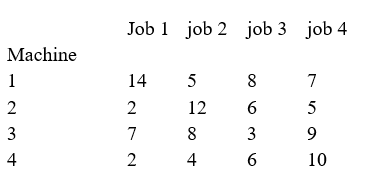

In [2]:
setup_times = np.array([[14,5,8,7],
                        [2,12,6,5],
                        [7,8,3,9],
                        [2,4,6,10]])

In [3]:
#using Simulated Annealing
def calc_total_setup_time(current_solution,setup_times):
    total_setup = 0
    for assignment in current_solution:
        total_setup+=setup_times[assignment[0],assignment[1]]
    return total_setup

def make_neighbor(current_solution):
    machineFlips = np.random.choice(np.indices([4])[0],2,replace=False)
    jobFlip1 = current_solution[machineFlips[0]][1]
    jobFlip2 = current_solution[machineFlips[1]][1]
    neighbor = current_solution.copy()
    neighbor[machineFlips[0]][1] = jobFlip2
    neighbor[machineFlips[1]][1] = jobFlip1
    return neighbor

def simulated_annealing(starting_temperature,initial_solution, alpha=0.90,epsilon=0.000000000000001):
    best_solution = initial_solution.copy()
    best_solution_obj = calc_total_setup_time(best_solution,setup_times)
    temperature = starting_temperature

    current_solution = initial_solution.copy()
    current_objective = calc_total_setup_time(current_solution,setup_times)
    while temperature >= epsilon:        
        #make a neighboring solution and evaluate its objective
        new_solution = make_neighbor(current_solution)
        new_obj = calc_total_setup_time(new_solution,setup_times)
        #possibly update best_solution
        if new_obj<best_solution_obj:
            best_solution = new_solution
            best_solution_obj = new_obj
            
        ### accept the new assignments if the solution is improved or the probability threshold is met ###
        if new_obj < current_objective or np.exp(-(new_obj - current_objective) / temperature) > random.random():
            current_solution = new_solution
            current_objective = new_obj
           
        ### lower the temperature ###
        temperature = temperature * alpha
    return (best_solution, best_solution_obj) 

best_solution, best_objective = simulated_annealing(100,initial_solution=np.array([(0,3),(1,1),(2,0),(3,2)]))
print('best solution found:')
print(best_solution)
print()
print('min objective found:',best_objective)

best solution found:
[[0 1]
 [1 3]
 [2 2]
 [3 0]]

min objective found: 15


### 5.

- For a 2 machine flow shop (jobs flow from machine 1 to 2), and total weighted tardiness as the objective to be minimized, find a schedule. 
- Apply the ATC heuristic with K=1
- Apply any local search. 
- Compare your answers with ATC.

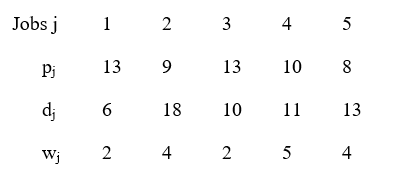

#### ATC heuristic 

In [2]:
#matrix representation of the processing times, due dates , and weights for each job j
jobs_matrix = np.array([[13,9,13,10,8],[6,18,10,11,13],[2,4,2,5,4]])
p = jobs_matrix[0]
d = jobs_matrix[1]
w = jobs_matrix[2]

K=1
remaining_jobs = [0,1,2,3,4]
atc_solution = []

#stuff i'm using for computing t
t=0
completion_time = [0,0,0,0,0] 
current_time_M1 = 0
cumulative_delta = 0

def select_next_job(remaining_jobs,p,w,K,t,current_time_M1,cumulative_delta,completion_time):
    #calculate the Index
    Index = {}
    for j in remaining_jobs:
        pBar = np.mean([p[j] for j in remaining_jobs])
        Index[j] = (w[j]/p[j])*np.exp(-(max(d[j]-p[j]-t,0)/K*pBar))
       
    highest_index = max(Index, key=Index.get)
    del Index[highest_index]
    
    #remove j from remaining jobs
    remaining_jobs.remove(highest_index)
    #add j to solution
    atc_solution.append(highest_index)
    
    #update time
    for i in atc_solution:
        i=i-1
        completion_time[i] = 2*p[i]+current_time_M1
        try:
            delta = previous_p-p[i]
            cumulative_delta+=delta
            completion_time[i]+=cumulative_delta    
        except:
            None
        previous_p = p[i].copy()       
        current_time_M1 += p[i]
    t = max(completion_time)
    return None
    
while len(remaining_jobs)>0:
    select_next_job(remaining_jobs,p,w,K,t,current_time_M1,cumulative_delta,completion_time)

#show job number instead of index number
atc_solution = [j+1 for j in atc_solution]

#### Tabu Search

In [3]:
#matrix representation of the processing times, due dates , and weights for each job j
jobs_matrix = np.array([[13,9,13,10,8],[6,18,10,11,13],[2,4,2,5,4]])
p = jobs_matrix[0]
d = jobs_matrix[1]
w = jobs_matrix[2]

def make_neighbor(current_solution,tabu_list):
    """Finds a valid neighboring solution"""
    invalid_neighbor = True
    while invalid_neighbor == True:
        #swap two jobs in the sequence
        swaps = np.random.choice(np.indices([5])[0],2,replace=False)
        swap1 = swaps[0]
        swap2 = swaps[1]
        current_solution[swap1],current_solution[swap2] = current_solution[swap2], current_solution[swap1]
        invalid_neighbor = any([all(current_solution==tabu) for tabu in tabu_list])
        if invalid_neighbor==False:
            neighbor = current_solution
    return neighbor

def update_tabu_list(tabu_list,current_solution):
    """Keeps the tabu list updated"""
    #place the current solution as the last solution in the list
    tabu_list = np.concatenate((tabu_list,[current_solution]),axis=0)
    #remove the first solution in the list   
    tabu_list = np.delete(tabu_list,0,axis=0)
    return tabu_list

def weighted_tardiness(p,d,w,solution):
    """Calculates the objective for flow shop"""
    #calculate the completion times
    completion_time = [0,0,0,0,0]
    current_time_M1 = 0
    cumulative_delta = 0
    for j in solution:
        j=j-1
        completion_time[j] = 2*p[j]+current_time_M1
        try:
            delta = previous_p-p[j]
            cumulative_delta+=delta
            completion_time[j]+=cumulative_delta    
        except:
            None
        previous_p = p[j].copy()       
        current_time_M1 += p[j]
    #compare completion times with the due dates to see how tardy the jobs are
    t = completion_time-d
    #calculate the weighted tardiness
    WT = np.dot(w,t)  
    return WT

def tabu_search(solution,p,d,w,tabu_list,max_iterations=10000):
    """Performs the tabu search heuristic"""
    best_solution = None
    best_solution_WT = 1000
    iteration = 0
    while iteration<max_iterations:
        #make a neighboring solution
        solution = make_neighbor(solution,tabu_list)
        #evaluate the objective
        WT = weighted_tardiness(p,d,w,solution)
        #possibly update best_solution
        if WT<best_solution_WT:
            best_solution = solution.copy()
            best_solution_WT = WT
            iterations_to_reach_best = iteration

        #update the tabu list
        tabu_list = update_tabu_list(tabu_list,solution)
        
        #update iteration_counter
        iteration+=1
    return best_solution,best_solution_WT,tabu_list,iterations_to_reach_best

#initial solution and tabu list
solution = np.array([1,2,3,4,5])
tabu_list = np.zeros(shape=(3,5)) 

#run tabu search
best_solution,best_solution_WT,tabu_list,iterations_to_reach_best = tabu_search(solution,p,d,w,tabu_list)

#### Comparison

In [4]:
print('ATC Solution:',atc_solution,'Total Weighted Tardiness:',weighted_tardiness(p,d,w,atc_solution))
print('Tabu Search Solution:',best_solution,'Total Weighted Tardiness:',best_solution_WT)

ATC Solution: [1, 3, 4, 5, 2] Total Weighted Tardiness: 656
Tabu Search Solution: [5 4 2 1 3] Total Weighted Tardiness: 341


### 6. 

- Apply the shifting bottleneck heuristics with and without resequencing, and  with the objective to minimize maximum completion time. 

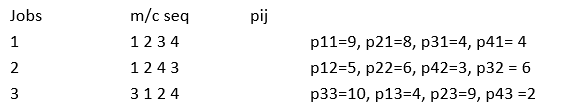

- Draw the Gantt chart



#### This is some code that I wrote before switching over to Excel. It was getting too time consuming to write all the code for each step.

In [ ]:
#i=machine, j=job
P = np.array([[9,8,4,4],
              [5,6,3,6],
              [10,4,9,2]])

#get all possible sequencing of jobs for each machine
machines = [0,1,2,3]
jobs = [0,1,2]
machine_sequences = {
    0:[0,1,2],
    1:[1,0,3,2],
    2:[0,1,3],
}
jobs_on_machine = {
    0:[],
    1:[],
    2:[],
    3:[]
}
for machine in machines:
    for job in machine_sequences:
        if machine in machine_sequences[job]:
            jobs_on_machine[machine].append(job)         
            
possible_sequences = {}
for machine in machines:
    possible_sequences[machine] = list(itertools.permutations(jobs_on_machine[machine]))
    
def get_Lmax(machine):
    Lmax = {}
    
    for sequence in possible_sequences[machine]:
        completion_times = []
        current_time = 0
        for job in sequence:#possible_sequences[machine][sequence]:
            completion_time = current_time+processing_times[job]
            if release_dates[job]>current_time:
                completion_time += release_dates[job]-current_time
            completion_times.append(completion_time)
            current_time=completion_time

        due_dates_ordered = []
        for job in sequence:#possible_sequences[machine][sequence]:
            due_dates_ordered.append(due_dates[job])
        print(sequence)
        print(completion_times)
        print(due_dates_ordered)
        Lmax[sequence] = max([completion_times[i]-due_dates_ordered[i] for i in sequence])# possible_sequences[machine][sequence]])
    return Lmax
get_Lmax(3)

Cmaxs = np.nansum(P,axis=1)
Cmax = np.max(Cmaxs)
processing_times = P[:,0]

#release_date
def get_release_dates(machine):
    release_dates = []
    for job in jobs:
        release_date = 0
        machine_sequence = 100
        while machine_sequence!=machine:
            for machine_sequence in machine_sequences[job]:
                if machine_sequence==machine:
                    break
                release_date+=P[job,machine_sequence]
        
        release_dates.append(release_date)
    return release_dates
release_dates = get_release_dates(0)
release_dates

def get_due_dates(machine):
    due_dates = []
    for job in jobs:
        due_date = 0
        machine_sequence = 100
        while machine_sequence!=machine:
            for machine_sequence in machine_sequences[job][::-1]:
                if machine_sequence==machine:
                    break
                due_date+=P[job,machine_sequence]
        
        due_dates.append(Cmax-due_date)
    return due_dates
due_dates = get_due_dates(0)

### 7. 

- A truck must serve cities within a radius of 20 miles from its garage. For the data in miles between cities given below, determine the minimum number of trucks to purchase and where to garage them

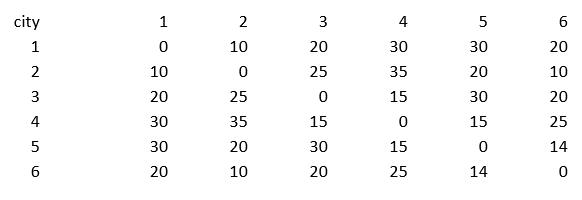

##### Assumptions
- If a city is exactly 20 miles away from another, a truck garaged there can be used to serve that city (i.e. distance contraint is <=20 not <20)
- I only need to purchase enough trucks to cover all cities, so the max number of trucks to purchase is 6

In [2]:
distances = np.array([[0,10,20,30,30,20],
                      [10,0,25,35,20,10],
                      [20,25,0,15,30,20],
                      [30,35,15,0,15,25],
                      [30,20,30,15,0,14],
                      [20,10,20,25,14,0]])
cities = [0,1,2,3,4,5]
initial_solution = np.ones(shape=(6)) #purchase a truck for every city
tabu_list = np.zeros(shape=(3,6)) 

def make_neighbor(current_solution,tabu_list):
    is_feasible = False
    in_tabu = True
    while not is_feasible and in_tabu:
        random_city = np.random.choice(np.indices([6])[0],1,replace=False)[0]
        if current_solution[random_city] == 0:
            change = 1
        else:
            change = 0
        neighbor = current_solution.copy()
        neighbor[random_city] = change
        is_feasible,cities_not_served = check_feasibility(neighbor)
        in_tabu = any([all(current_solution==tabu) for tabu in tabu_list])
    return neighbor

def calc_obj(current_solution):
    obj = np.sum(current_solution)
    return obj

def update_tabu_list(tabu_list,current_solution):
    """Keeps the tabu list updated"""
    #place the current solution as the last solution in the list
    tabu_list = np.concatenate((tabu_list,[current_solution]),axis=0)
    #remove the first solution in the list   
    tabu_list = np.delete(tabu_list,0,axis=0)
    return tabu_list

def check_feasibility(current_solution):
    """Determines whether the selected cities to garage trucks in allows all cities to be served"""
    #go through each city
    cities_not_served = [0,1,2,3,4,5] #np.ones(shape=(1,6))
    for garage_city in cities:
        #if the city is selected to garage a truck
        if current_solution[garage_city]==1:
            for served_city in cities:
                if distances[garage_city][served_city]<=20 and served_city in cities_not_served:
                    cities_not_served.remove(served_city)
    if len(cities_not_served)>0:
        is_feasible=False
    else:
        is_feasible=True
    return (is_feasible,cities_not_served)

def tabu_search(initial_solution,tabu_list,max_iterations=100):
    iteration=0
    best_solution = initial_solution
    best_objective = calc_obj(best_solution)
    current_solution = initial_solution
    current_objective = calc_obj(current_solution)
    while iteration<max_iterations:
        new_solution = make_neighbor(current_solution,tabu_list)
        new_objective = calc_obj(new_solution)
        if new_objective<best_objective:
            best_solution = new_solution
            best_objective = new_objective
        if new_objective<current_objective:
            current_solution = new_solution
            current_objective = new_objective
        #update tabu list
        tabu_list = update_tabu_list(tabu_list,current_solution)
        iteration+=1
    return (best_solution,best_objective)

best_solution,best_objective = tabu_search(initial_solution,tabu_list)
print('min number of cities to garage trucks in:',best_objective)
print('cities to garage a truck in:',[i+1 for i in cities if best_solution[i]==1])

min number of cities to garage trucks in: 2.0
cities to garage a truck in: [1, 5]


### 8. 

#### Solved in Excel

### 9. 

#### Solved in Excel

### 10. 

#### Solved in Excel